Pre-processing

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 
import warnings
from func import ind, fl, fitData
warnings.filterwarnings("ignore")

Import Data and Preproccesing

In [3]:
csv_columns = ['Date_Time', 'total_power']

In [5]:
data = pd.read_csv('/home/ict4bd/Desktop/Project/Data_Output/simulation_Data_3Year.csv',sep=',',decimal=',',index_col=0 ,usecols=csv_columns, low_memory=False)

CONVERTING DATA FROM STRING TO FLOAT

In [6]:
data = fl(data)

CONVERTING FROM STRING INDEX TO DATETIME INDEX

In [7]:
data = ind(data)

FITTING MISSING DATA

In [8]:
data = fitData(data)

Storing Data in New CSV

In [9]:
data.to_csv(path_or_buf='/home/ict4bd/Desktop/Project/Data_Output/Data_for_ARIMA.csv',index=False)

PLOTTING DATA 

Text(0.5, 1.0, 'Time Series of Energy Consumption')

<Figure size 432x288 with 0 Axes>

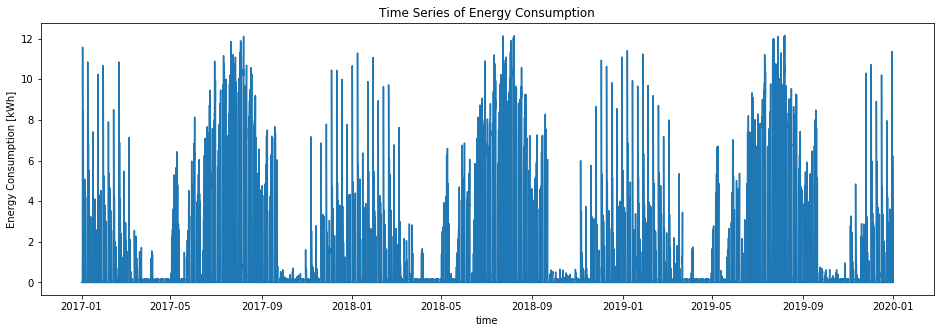

In [10]:
plt.figure()
fig, ax = plt.subplots( 1, 1, figsize=(16,5) )
plt.plot(data.total_power)
plt.xlabel("time")
plt.ylabel("Energy Consumption [kWh]")
plt.title("Time Series of Energy Consumption")

Plotting ACF 

Text(0.5, 1.0, 'Autocorrelation')

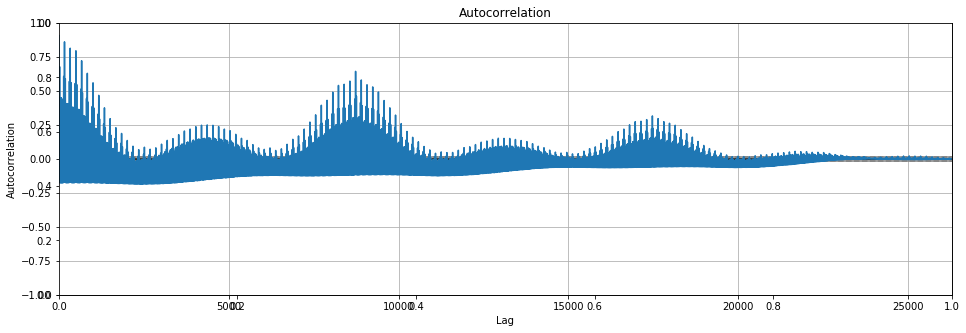

In [11]:
fig0, ax0 = plt.subplots( 1, 1, figsize=(16,5) )
pd.plotting.autocorrelation_plot(data.total_power)
plt.title('Autocorrelation')

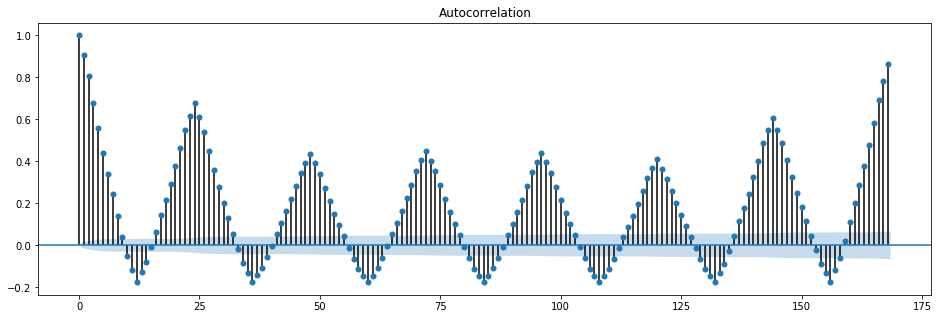

In [12]:
fig1, ax1 = plt.subplots( 1, 1, figsize=(16,5) )
plot_acf( data.total_power, ax = ax1, lags = 24*7 )
fig1.show()

Partial Autocorrelation

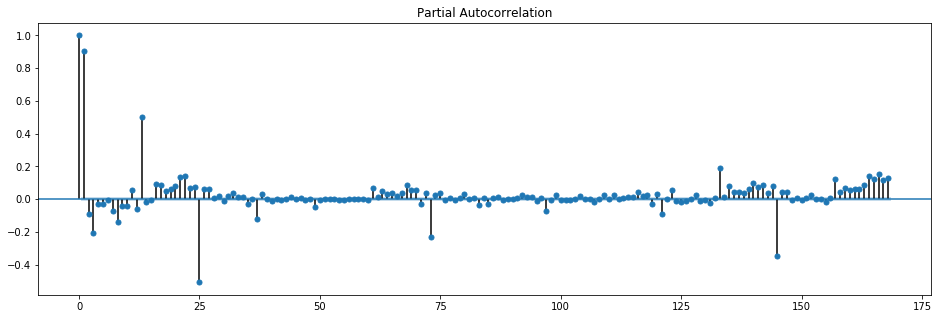

In [13]:
fig2, ax2 = plt.subplots( 1, 1, figsize=(16,5))
plot_pacf( data.total_power, ax = ax2, lags = 24*7)
fig2.show()

CHECKING STATIONARITY OF THE SERIES (Weekly)

Text(0.5, 1.0, 'Statistics about total power (weekly)')

<Figure size 432x288 with 0 Axes>

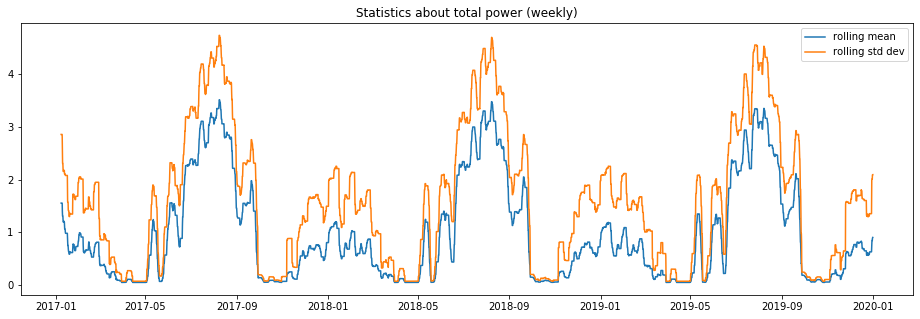

In [14]:
m = data['total_power'].rolling(window = 24*7).mean()
std = data['total_power'].rolling(window = 24*7).std()
plt.figure()
fig, ax = plt.subplots( 1, 1, figsize=(16,5) )
plt.plot(m, label='rolling mean')
plt.plot(std, label='rolling std dev')
plt.legend()
plt.title('Statistics about total power (weekly)')

CHECKING STATIONARITY OF THE SERIES (Monthly)

Text(0.5, 1.0, 'Statistics about total power (monthly)')

<Figure size 432x288 with 0 Axes>

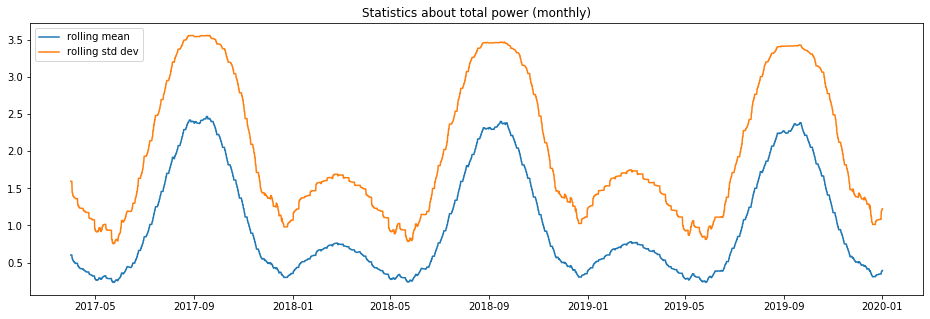

In [15]:
m = data['total_power'].rolling(window = 24*90).mean()
std = data['total_power'].rolling(window = 24*90).std()
plt.figure()
fig, ax = plt.subplots( 1, 1, figsize=(16,5) )
plt.plot(m, label='rolling mean')
plt.plot(std, label='rolling std dev')
plt.legend()
plt.title('Statistics about total power (monthly)')